<a href="https://colab.research.google.com/github/mariakxr/mariakxr.github.io/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HW3***
**Maria Kechri, 23 Jan 2022**

# **Problem 2**


---


### Problem Formulation:

Optimal control for the system
$$
\dot x = -ax + bu 
$$
and that we want to minimize a cost function of the form
$$
\frac{1}{2}\int_{t_0}^{t_f} u^2(t) dt + \frac{1}{2}cx^2(t_f)
$$

In [70]:
# Import the needed packages
!pip install control
import numpy as np
import math as math
import matplotlib.pyplot as plt
import control as ct
import control.flatsys as fs
import control.optimal as opt
import time
import scipy.signal as ss
import scipy as sp
import scipy.integrate as spint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Plot Solution:

In [35]:
def plot_sys(t, x, u, figure=None, yf=None):

    # Plot the input as a function of time
    plt.subplot(1, 2, 1, label='u')
    plt.plot(t, u)
    plt.xlabel("Time $t$ [sec]")
    plt.ylabel("$u$")

    # Plot the state as a function of time
    plt.subplot(1, 2, 2, label='x')
    plt.plot(t, x)
    plt.xlabel("Time $t$ [sec]")
    plt.ylabel("$x$")

    #plt.suptitle("Input and State Trajectories",y=1.0)
    plt.tight_layout()

### System Dynamics:

In [36]:
# Parameters
a  = 1.
b  = 1.
c  = 1.
Tf = 1. # Tf = tf-t0

# Initial conditions
x0 = np.array([1.,5.,10.])

u0 = np.array([0.,0.,0.])  # define intial input to be zero
xf = np.array([0.])
uf = np.array([0.])

# Define system
sysss = ct.StateSpace(-a, b, 1., 0.) # State Space System
sys   = ct.LinearIOSystem(sysss)     # Input Output System
print(sys)

<LinearIOSystem>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']

A = [[-1.]]

B = [[1.]]

C = [[1.]]

D = [[0.]]



### Analytical Solution:

In [37]:
# Define the analytical solution for the optimal input
def inan(t, xin):

  num1 = 2*a*b*np.exp(-a*(2*Tf-t))*xin
  den1 = -2*a-b*b*c*(1-np.exp(-2*a*Tf))
  u    = num1/den1

  return u

# Define the analytical solution for the optimal state
def stan(t, xin):

  num2 = b*b*c*np.exp(-a*Tf)*xin*(np.exp(-a*(Tf-t))-np.exp(-a*(t+Tf)))
  den2 = -2*a-b*b*c*(1-np.exp(-2*a*Tf))
  x    = xin*np.exp(-a*t)+num2/den2
  
  return x

### b) Optimal Control with Terminal Cost:

Summary statistics:
* Cost function calls: 328
* System simulations: 0
* Final cost: 0.09445920786452447
* Total time = 0.290282 seconds

Final computed optimized state:  [0.25674761]


<ipython-input-35-aba943cb6fa6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1, label='u')
<ipython-input-35-aba943cb6fa6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2, label='x')


Summary statistics:
* Cost function calls: 451
* System simulations: 0
* Final cost: 2.361466990056541
* Total time = 0.307164 seconds

Final computed optimized state:  [1.28412248]


<ipython-input-35-aba943cb6fa6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1, label='u')
<ipython-input-35-aba943cb6fa6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2, label='x')


Summary statistics:
* Cost function calls: 451
* System simulations: 0
* Final cost: 9.445867960155246
* Total time = 0.430898 seconds

Final computed optimized state:  [2.56824464]


<ipython-input-35-aba943cb6fa6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1, label='u')
<ipython-input-35-aba943cb6fa6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2, label='x')


<Figure size 432x288 with 0 Axes>

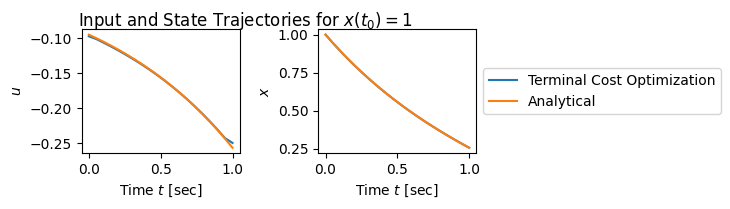

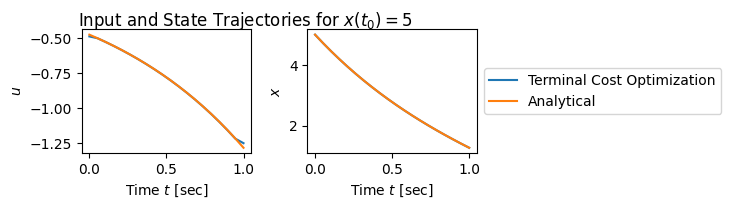

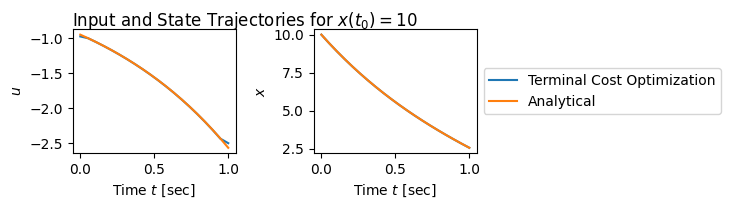

In [40]:
# Define the time horizon (and spacing) for the optimization
timepts = np.linspace(0, Tf, 20, endpoint=True)

# Define trajectory (integral) cost
traj_cost = opt.quadratic_cost(sys, None, 1., u0=uf)
# Define terminal cost
term_cost = opt.quadratic_cost(sys, c, None, x0=xf)

i = 0
while i < 3:

 # Compute some initial guesses to use
 guess0 = (               
      np.array([x0[i] + (xf - x0[i]) * t/Tf for t in timepts]).transpose(), u0[i]
 )

 # Compute the optimal control
 start_time = time.process_time()
 result = opt.solve_ocp(
    sys, timepts, x0[i], traj_cost, None, terminal_cost=term_cost,
    initial_guess=guess0
 )
 print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

 plt.figure(i+1)
 plt.figure(figsize=(5, 2), dpi=100)
 plt.suptitle("Input and State Trajectories for $x(t_0) = %i$"%x0[i],y=1.02)

 # Plot the results from the optimization
 plot_sys(timepts, np.transpose(result.states), result.inputs)
 print("Final computed optimized state: ", result.states[:,-1])

 # Plot the analytic solution
 xc = stan(timepts,x0[i])
 uc = inan(timepts,x0[i])
 plot_sys(timepts, xc, uc)
 #print("Final computed analytical state:", xc[:,-1])

 # Add a legend
 plt.legend(['Terminal Cost Optimization','Analytical'], loc='center left', bbox_to_anchor=(1, 0.5))

 i += 1

### c) Optimal Control with Terminal Constraint:

Summary statistics:
* Cost function calls: 328
* Eqconst calls: 378
* System simulations: 0
* Final cost: 0.31307038169360074
* Total time = 0.197064 seconds

Final computed optimized state:  [0.]
Summary statistics:
* Cost function calls: 328
* Eqconst calls: 378
* System simulations: 0
* Final cost: 7.826759542106368
* Total time = 0.385311 seconds

Final computed optimized state:  [0.]


<ipython-input-35-aba943cb6fa6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1, label='u')
<ipython-input-35-aba943cb6fa6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2, label='x')


Summary statistics:
* Cost function calls: 328
* Eqconst calls: 378
* System simulations: 0
* Final cost: 31.307038170958645
* Total time = 0.349406 seconds

Final computed optimized state:  [0.]


<ipython-input-35-aba943cb6fa6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1, label='u')
<ipython-input-35-aba943cb6fa6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2, label='x')


<Figure size 432x288 with 0 Axes>

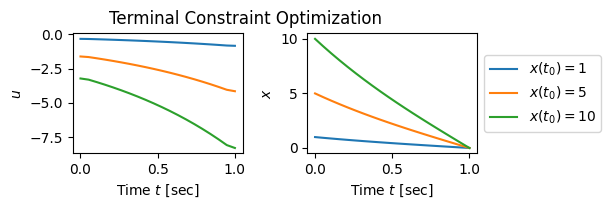

In [43]:
# Define trajectory (integral) cost
traj_cost = opt.quadratic_cost(sys, None, 1., u0=uf)
# Define terminal constraint
terminal = [ opt.state_range_constraint(sys, xf, xf) ]

plt.figure()
plt.figure(figsize=(5, 2), dpi=100)
plt.suptitle("Terminal Constraint Optimization",y=1.02)

j = 0
while j < 3:

 # Compute some initial guesses to use
 guess0 = (               
      np.array([x0[j] + (xf - x0[j]) * t/Tf for t in timepts]).transpose(), u0[j]
 )

 # Compute the optimal control
 start_time = time.process_time()
 result = opt.solve_ocp(
    sys, timepts, x0[j], traj_cost, None, terminal_constraints=terminal,
    initial_guess=guess0
 )
 print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

 # Plot the results from the optimization
 plot_sys(timepts, np.transpose(result.states), result.inputs)
 print("Final computed optimized state: ", result.states[:,-1])

 j += 1

plt.legend(['$x(t_0) = %i$'%x0[0],'$x(t_0) = %i$'%x0[1],'$x(t_0) = %i$'%x0[2]], loc='center left', bbox_to_anchor=(1, 0.5))

# **Problem 3**


---


In [107]:
from pvtol import _pvtol_update , _pvtol_output, _pvtol_flat_forward, _pvtol_flat_reverse, pvtol, plot_results

pvtol_nonlin = ct.NonlinearIOSystem(
    _pvtol_update, _pvtol_output, name='pvtol_nonlin',
    states = [f'x{i}' for i in range(6)],
    inputs = ['F1', 'F2'],
    outputs = [f'x{i}' for i in range(6)],
    params = {
        'm': 4.,                # mass of aircraft
        'J': 0.0475,            # inertia around pitch axis
        'r': 0.25,              # distance to center of force
        'g': 9.8,               # gravitational constant
        'c': 0.05,              # damping factor (estimated)
    }
)
print(pvtol_nonlin)

<NonlinearIOSystem>: pvtol_nonlin
Inputs (2): ['F1', 'F2']
Outputs (6): ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']
States (6): ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']

Update: <function _pvtol_update at 0x7f2df977cb80>
Output: <function _pvtol_output at 0x7f2df977cf70>


### a) Optimal trajectory using quadratic cost function

39.2
Summary statistics:
* Cost function calls: 2751
* System simulations: 0
* Final cost: 1.5620901013565078
* Total time = 4.1353 seconds

Final computed state from optimization with quadratic cost function:  [ 9.99728738e-01  2.91413433e-04 -2.09182628e-05 -1.34884622e-04
  2.32648329e-03 -1.95260674e-04]
Final simulated state: [ 6.69036283e+00 -1.21215337e-01  3.51630639e-03  7.83208081e-01
 -1.01444128e-02  2.55268810e-03]
The weighted integral cost is: 0.12729588035089606


<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

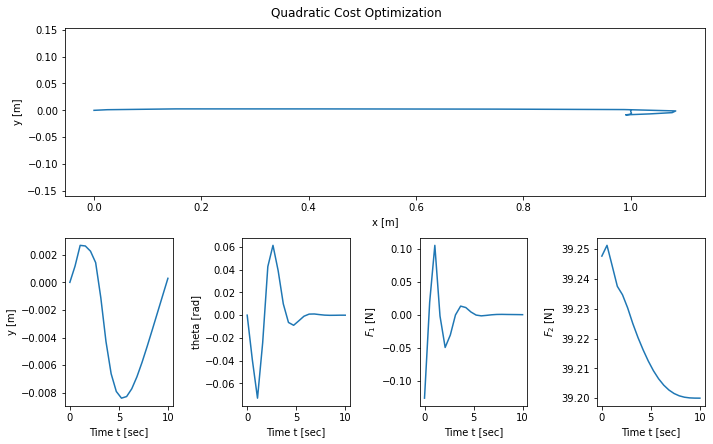

<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

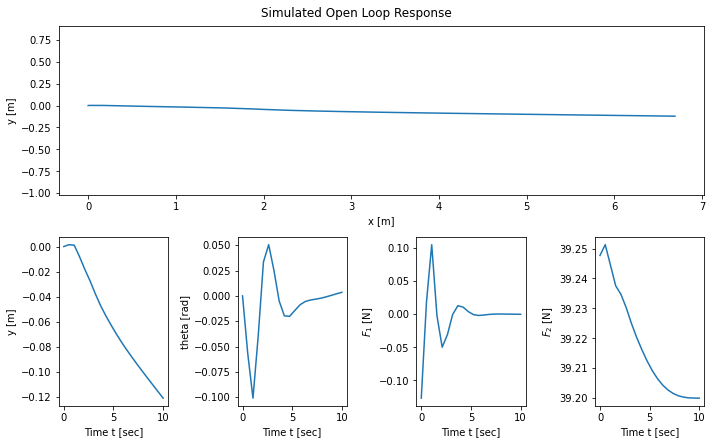

In [108]:
# Initial and final conditions
F2 = 4.*9.8
print(F2)
x0 = np.array([0., 0., 0., 0., 0., 0.]); u0 = np.array([0., F2])
xf = np.array([1., 0., 0., 0., 0., 0.]); uf = np.array([0., F2])
Tf = 10

# Define the time horizon (and spacing) for the optimization
timepts = np.linspace(0, Tf, 20, endpoint=True)

# Compute some initial guesses to use
straight_line = (               # straight line from start to end with nominal input
    np.array([x0 + (xf - x0) * t/Tf for t in timepts]).transpose(), 
    u0
)

# Set up the cost functions
Qx        = np.diag([1., 1., 10., 0., 0., 0.]) # minimize angular deviation θ
Qu        = np.diag([10., 1.])                 # minimize sideways forc F1
quad_cost = opt.quadratic_cost(pvtol_nonlin, Qx, Qu, x0=xf, u0=uf)

# Compute the optimal control, setting step size for gradient calculation (eps)
start_time = time.process_time()
result1 = opt.solve_ocp(
    pvtol_nonlin, timepts, x0, quad_cost, initial_guess=straight_line
)
print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
# Plot the results from the optimization
plot_results(timepts, result1.states, result1.inputs)
plt.suptitle("Quadratic Cost Optimization",y=1.02)
print("Final computed state from optimization with quadratic cost function: ", result1.states[:,-1])

# Simulate the system and see what happens
t1, u1 = result1.time, result1.inputs
t1, y1 = ct.input_output_response(pvtol_nonlin, timepts, u1, x0)
plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
plot_results(t1, y1, u1)
plt.suptitle("Simulated Open Loop Response",y=1.02)
print("Final simulated state:", y1[:,-1])

# Compute weighted integral cost
fint  = (10*u1[0,:]**2)+(u1[1,:]-F2)**2
wcost = spint.trapezoid(fint,timepts)
print("The weighted integral cost is:", wcost)

### b) Resolve using Bezier Curves

Summary statistics:
* Cost function calls: 1064
* System simulations: 0
* Final cost: 1.9223009536370836
* Total time = 4.11952 seconds

Final computed state from optimization with Bezier basis:  [ 0.97053527 -0.01064178 -0.01919391  0.06676139 -0.00618822  0.09593556]
Final simulated state: [ 4.47328996 -0.0426815  -0.04279471  0.90979288 -0.01515378  0.09505453]
The weighted integral cost is: 0.0456704628697827


<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

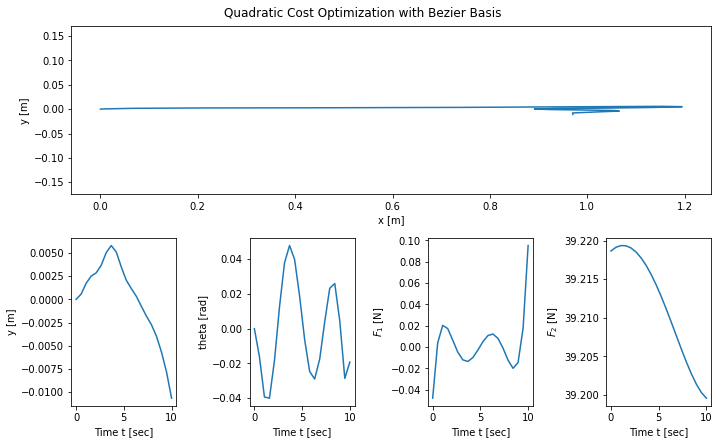

<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

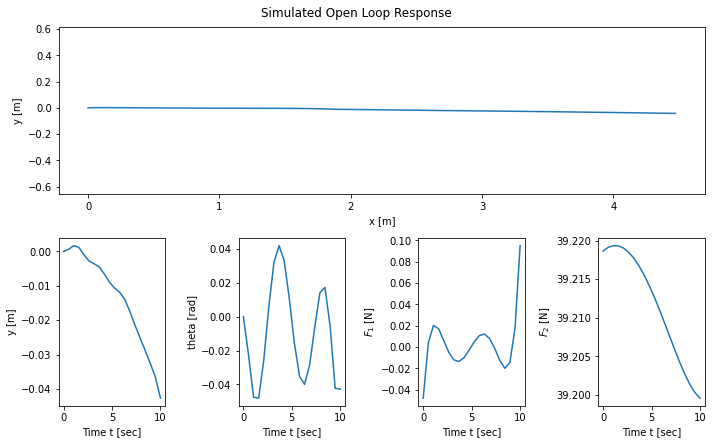

In [109]:
# Get basis functions for flat systems module
import control.flatsys as flat

# Compute the optimal control
start_time = time.process_time()
result2 = opt.solve_ocp(
    pvtol_nonlin, timepts, x0, quad_cost, initial_guess=straight_line,
    basis=flat.BezierFamily(6, Tf),log=False
)
print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
# Plot the results from the optimization
plot_results(timepts, result2.states, result2.inputs)
plt.suptitle("Quadratic Cost Optimization with Bezier Basis",y=1.02)
print("Final computed state from optimization with Bezier basis: ", result2.states[:,-1])

# Simulate the system and see what happens
t2, u2 = result2.time, result2.inputs
t2, y2 = ct.input_output_response(pvtol_nonlin, timepts, u2, x0)
plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
plot_results(t2, y2, u2)
plt.suptitle("Simulated Open Loop Response",y=1.02)
print("Final simulated state:", y2[:,-1])

# Compute weighted integral cost
fint  = (10*u2[0,:]**2)+(u2[1,:]-F2)**2
wcost = spint.trapezoid(fint,timepts)
print("The weighted integral cost is:", wcost)


### c) Resolve by adding a terminal cost $P_1$, and plot the results for different combinations of $Q_x, P_1$

Summary statistics:
* Cost function calls: 2142
* System simulations: 0
* Final cost: 0.9192236048624776
* Total time = 10.1479 seconds

Final computed state from optimization with quadratic cost function:  [ 8.07824831e-02 -1.87667317e-05  3.10769630e-04  9.31491431e-03
 -3.00685787e-05  2.26577446e-03]
Final simulated state: [ 9.78473721e-02 -2.30792007e-05  2.90121397e-04  1.08140673e-02
 -3.06961205e-05  2.33247951e-03]
The weighted integral cost is: 7.203687477732793e-06


<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

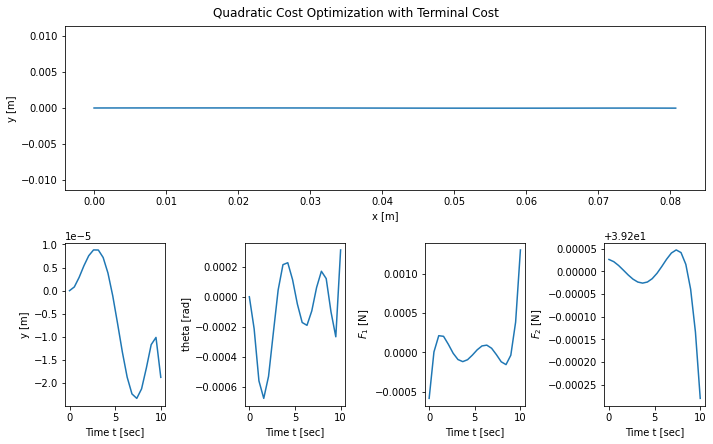

<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

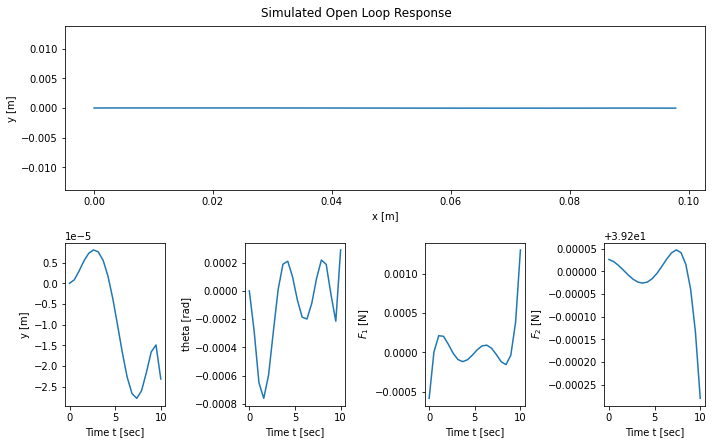

In [110]:
Qx        = np.diag([0., 0., 0., 100., 100., 100.]) # minimize angular deviation θ
quad_cost = opt.quadratic_cost(pvtol_nonlin, Qx, Qu, x0=xf, u0=uf)

P1        = np.diag([1.,1.,1.,1.,1.,1.])
term_cost = opt.quadratic_cost(pvtol_nonlin, P1, None, x0=xf)

# Compute the optimal control
start_time = time.process_time()
result3 = opt.solve_ocp(
    pvtol_nonlin, timepts, x0, quad_cost, terminal_cost=term_cost, 
    initial_guess=straight_line, basis=flat.BezierFamily(6, Tf),log=False
)
print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
# Plot the results from the optimization
plot_results(timepts, result3.states, result3.inputs)
plt.suptitle("Quadratic Cost Optimization with Terminal Cost",y=1.02)
print("Final computed state from optimization with quadratic cost function: ", result3.states[:,-1])

# Simulate the system and see what happens
t3, u3 = result3.time, result3.inputs
t3, y3 = ct.input_output_response(pvtol_nonlin, timepts, u3, x0)
plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
plot_results(t3, y3, u3)
plt.suptitle("Simulated Open Loop Response",y=1.02)
print("Final simulated state:", y3[:,-1])

# Compute weighted integral cost
fint  = (10*u3[0,:]**2)+(u3[1,:]-F2)**2
wcost = spint.trapezoid(fint,timepts)
print("The weighted integral cost is:", wcost)

### d) Resolve by adding a terminal constraint, and plot the results for different $Q_x$

Summary statistics:
* Cost function calls: 1065
* Eqconst calls: 1207
* System simulations: 0
* Final cost: 4.65227112343241e-05
* Total time = 5.48303 seconds

Final computed state from optimization with quadratic cost function:  [1. 0. 0. 0. 0. 0.]
Final simulated state: [ 1.07825588e+00 -2.76061320e-04 -2.77611839e-04  1.40340056e-02
 -1.69036707e-05  4.09954957e-05]
The weighted integral cost is: 4.652271123432411e-05


<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

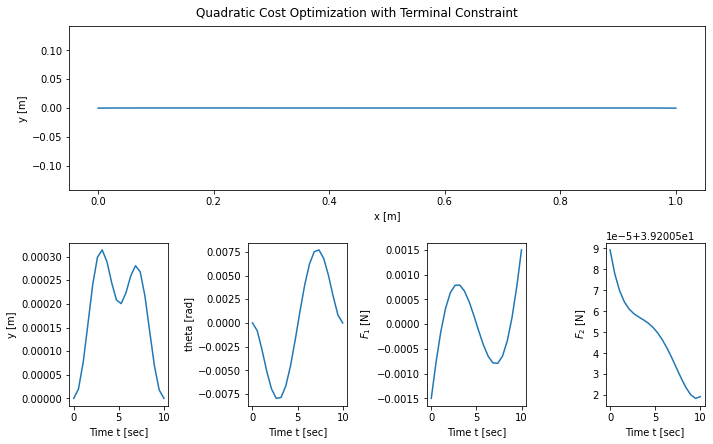

<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

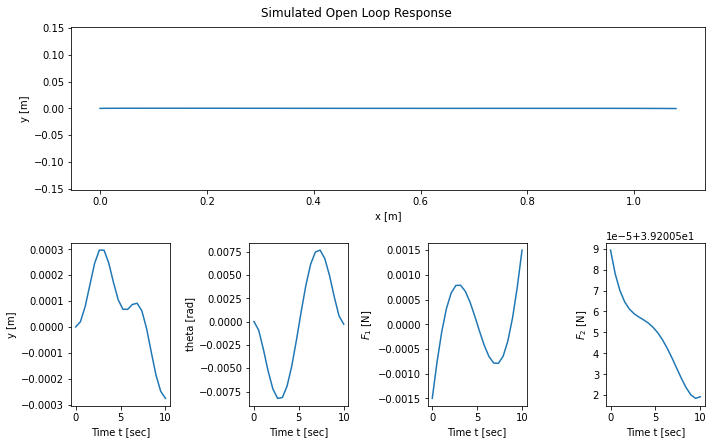

In [111]:
Qx        = np.diag([0., 0., 0., 0., 0., 0.]) # minimize angular deviation θ
quad_cost = opt.quadratic_cost(pvtol_nonlin, Qx, Qu, x0=xf, u0=uf)

terminal = [ opt.state_range_constraint(pvtol_nonlin, xf, xf) ]

# Compute the optimal control
start_time = time.process_time()
result4 = opt.solve_ocp(
    pvtol_nonlin, timepts, x0, quad_cost, terminal_constraints=terminal, 
    initial_guess=straight_line, basis=flat.BezierFamily(6, Tf),log=False
)
print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
# Plot the results from the optimization
plot_results(timepts, result4.states, result4.inputs)
plt.suptitle("Quadratic Cost Optimization with Terminal Constraint",y=1.02)
print("Final computed state from optimization with quadratic cost function: ", result4.states[:,-1])

# Simulate the system and see what happens
t4, u4 = result4.time, result4.inputs
t4, y4 = ct.input_output_response(pvtol_nonlin, timepts, u4, x0)
plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
plot_results(t4, y4, u4)
plt.suptitle("Simulated Open Loop Response",y=1.02)
print("Final simulated state:", y4[:,-1])

# Compute weighted integral cost
fint  = (10*u4[0,:]**2)+(u4[1,:]-F2)**2
wcost = spint.trapezoid(fint,timepts)
print("The weighted integral cost is:", wcost)

### e) Resolve using flat system

Since we get the smaller wighted integration cost, in combination with the final position and the smoothness of all responses, with the method in question d), we will use this one for this question as well.

Summary statistics:
* Cost function calls: 1065
* Eqconst calls: 1207
* System simulations: 0
* Final cost: 4.650623564011244e-05
* Total time = 5.50041 seconds

Final computed state from optimization with quadratic cost function:  [1. 0. 0. 0. 0. 0.]
Final simulated state: [ 1.08201573e+00 -2.95313407e-04 -3.40967308e-04  1.54837979e-02
 -2.01403453e-05 -6.63369225e-06]
The weighted integral cost is: 4.650623564011244e-05


<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

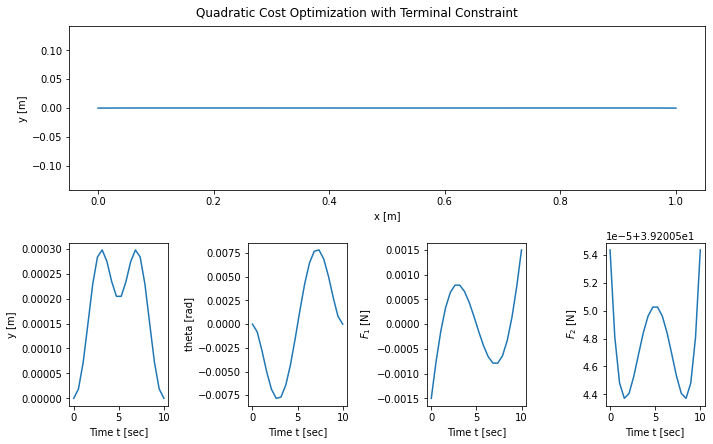

<Figure size 432x288 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

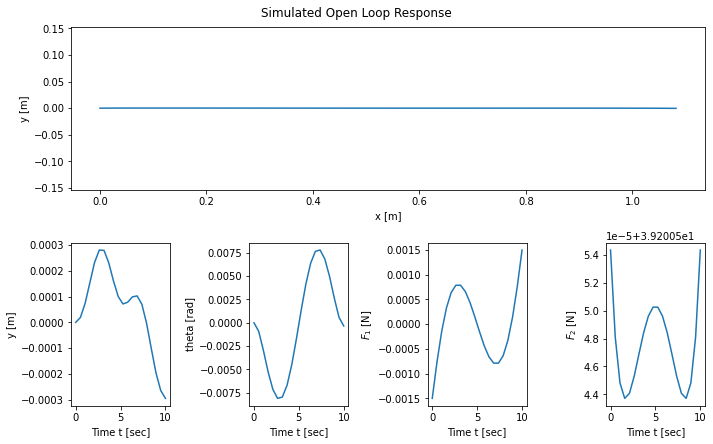

In [112]:
# Define the system with c=0

pvtolnew = fs.FlatSystem(
    _pvtol_flat_forward, _pvtol_flat_reverse, name='pvtol',
    updfcn=_pvtol_update, outfcn=_pvtol_output,
    states = [f'x{i}' for i in range(6)],
    inputs = ['F1', 'F2'],
    outputs = [f'x{i}' for i in range(6)],
    params = {
        'm': 4.,                # mass of aircraft
        'J': 0.0475,            # inertia around pitch axis
        'r': 0.25,              # distance to center of force
        'g': 9.8,               # gravitational constant
        'c': 0.0,              # damping factor (estimated)
    }
)

# Compute the optimal control
start_time = time.process_time()
result5 = opt.solve_ocp(
    pvtolnew, timepts, x0, quad_cost, terminal_constraints=terminal, 
    initial_guess=straight_line, basis=flat.BezierFamily(6, Tf),log=False
)
print("* Total time = %5g seconds\n" % (time.process_time() - start_time))

plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
# Plot the results from the optimization
plot_results(timepts, result5.states, result5.inputs)
plt.suptitle("Quadratic Cost Optimization with Terminal Constraint",y=1.02)
print("Final computed state from optimization with quadratic cost function: ", result5.states[:,-1])

# Simulate the system and see what happens
t5, u5 = result5.time, result5.inputs
t5, y5 = ct.input_output_response(pvtolnew, timepts, u5, x0)
plt.figure()
plt.figure(figsize=(5, 2), dpi=200)
plot_results(t5, y5, u5)
plt.suptitle("Simulated Open Loop Response",y=1.02)
print("Final simulated state:", y5[:,-1])

# Compute weighted integral cost
fint  = (10*u5[0,:]**2)+(u5[1,:]-F2)**2
wcost = spint.trapezoid(fint,timepts)
print("The weighted integral cost is:", wcost)